# **Business Case Yulu**

# Problem Statement

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

In [ ]:
# Importing the required modules for EDA and Hypothesis testing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp,ttest_ind,f_oneway,chi2_contingency
from statsmodels.stats import weightstats as stests

In [ ]:
data = pd.read_csv("bike_sharing.csv")
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data.shape

(10886, 12)

We can see that there are 12 columns and 10000 rows in the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


From the information of columns we can see that we can convert the season,workingday, weather  and holiday column to object type


In [ ]:
cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    data[col] = data[col].astype('object')

data['datetime'] = pd.to_datetime(data['datetime'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [ ]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

So we can say the data does'nt have any missing values .

In [ ]:
data.describe(include="all")

<ipython-input-9-959e96f52f7b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include="all")


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


In [ ]:
# minimum datetime and maximum datetime
print(data['datetime'].min(), data['datetime'].max())
# number of unique values in each categorical columns
data[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()

2011-01-01 00:00:00 2012-12-19 23:00:00


value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412


The provided data spans from January 2011 to December 2012, predominantly comprising working days. Seasonal distribution shows a nearly equal division across the four seasons. In terms of weather, the majority of days were characterized by clear skies, few clouds, and partly cloudy conditions compared to other weather patterns.

<Axes: xlabel='registered', ylabel='Count'>

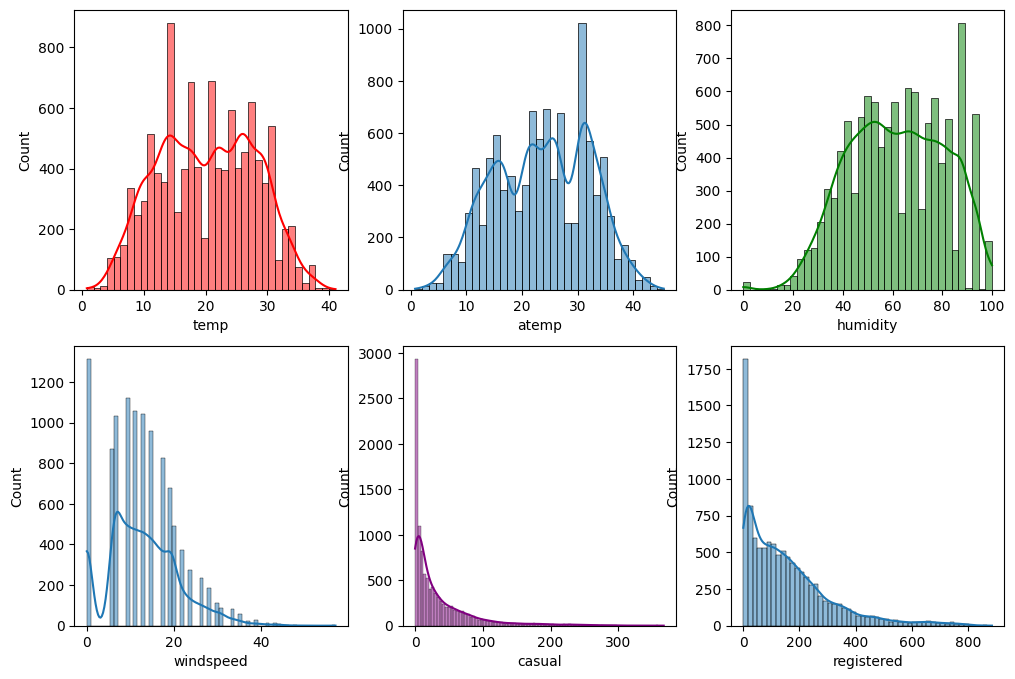

In [ ]:
#Univariate Analysis
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
sns.histplot(data['temp'],ax=axis[0, 0],kde=True,color="Red")
sns.histplot(data['atemp'],ax=axis[0, 1],kde=True)
sns.histplot(data['humidity'],ax=axis[0, 2],kde=True,color="Green")
sns.histplot(data['windspeed'],ax=axis[1, 0],kde=True)
sns.histplot(data['casual'],ax=axis[1, 1],kde=True,color="Purple")
sns.histplot(data['registered'],ax=axis[1, 2],kde=True)

From the graph we can see that temp,atemp and humidity graph have a normal distribution where as windspeed , casual and rigistered graphs are Right Skewed.

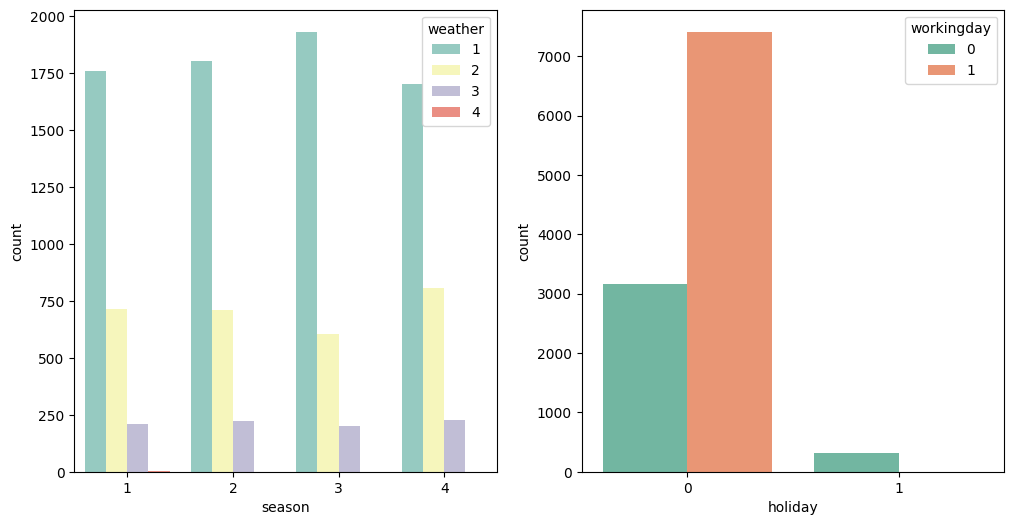

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.countplot(data=data, x="season",hue="weather", ax=axis[0],palette='Set3')

sns.countplot(data=data, x="holiday",hue="workingday", ax=axis[1],palette='Set2')
plt.show()

Now lets check for outliers

<Axes: ylabel='count'>

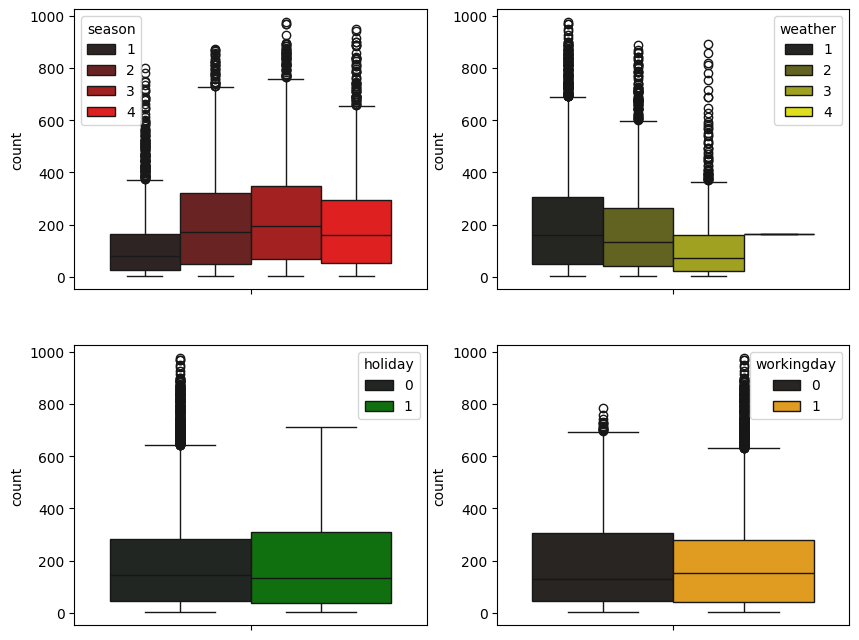

In [ ]:
#Bivariate Analysis
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

sns.boxplot(data=data,y='count',hue="season",palette="dark:Red",ax = axis[0,0])
sns.boxplot(data=data,y='count',hue="weather",palette="dark:Yellow",ax = axis[0,1])
sns.boxplot(data=data,y='count',hue="holiday",palette="dark:Green",ax = axis[1,0])
sns.boxplot(data=data,y='count',hue="workingday",palette="dark:Orange",ax = axis[1,1])

The season and weather data are significantly influenced by outliers, as are the records for holidays (marked with 1) and working days (neither weekends nor holidays), which also exhibit numerous outliers.

<Axes: ylabel='count'>

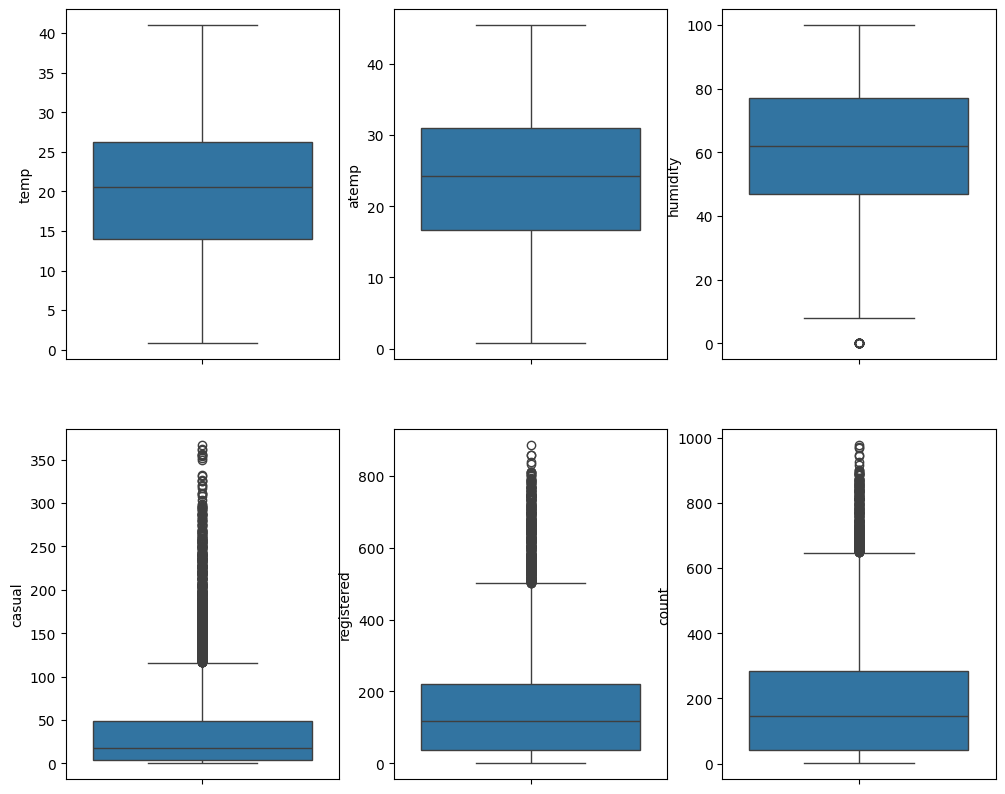

In [ ]:
#lets check for the numerical categories
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))

sns.boxplot(data=data,y='temp',ax = axis[0,0])
sns.boxplot(data=data,y='atemp',ax = axis[0,1])
sns.boxplot(data=data,y='humidity',ax = axis[0,2])
sns.boxplot(data=data,y='casual',ax = axis[1,0])
sns.boxplot(data=data,y='registered',ax = axis[1,1])
sns.boxplot(data=data,y='count',ax = axis[1,2])



Outliers are minimal in temperature, perceived temperature, and humidity data. However, there are numerous outliers in the counts for casual users, registered users, and the combined count of both.

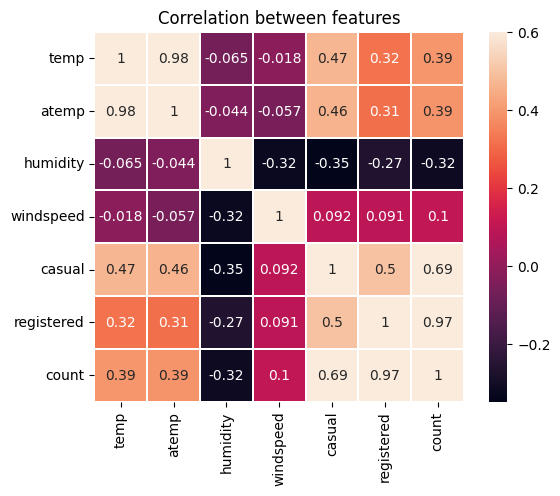

In [ ]:
# Lets understand the correlation between the columns
sns.heatmap(data.corr(method='pearson',numeric_only=True), vmax = .6, linewidths=0.01, square=True, annot=True)
plt.title('Correlation between features')
plt.show()

The map reveals a strong positive correlation between temperature (temp) and feeling temperature (atemp), as well as between the counts of casual users, registered users, and the total count. Conversely, humidity exhibits a negative correlation with windspeed, casual users, registered users, and the total count.

In [ ]:
#Lets conduct a TTest to determine if holiday and the count of users on yulu are dependent

holiday_group1 = data[data['holiday']==0]['count'].values
holiday_group2 = data[data['holiday']==1]['count'].values

#Lets define
#Ho: The mean of count when holiday is there or not is same
#Ha: The mean of count when holiday is there or not is statistically different
print(np.var(holiday_group1))
print(np.var(holiday_group2))
ttest_ind(holiday_group1,holiday_group2)

32943.901106481346
28233.99150132856


TtestResult(statistic=0.5626388963477119, pvalue=0.5736923883271103, df=10884.0)

From the above with 95% confidence level we Fail to reject Ho

TtestResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348, df=10884.0)

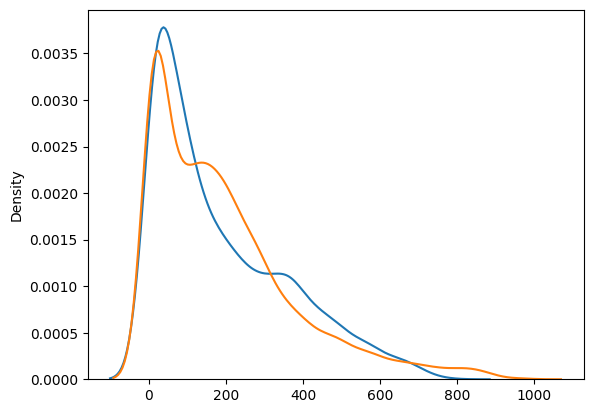

In [ ]:
#Lets do the T Test on working days along with count
workingday_group1 = data[data['workingday']==0]['count'].values
workingday_group2 = data[data['workingday']==1]['count'].values

sns.kdeplot(workingday_group1)
sns.kdeplot(workingday_group2)
#Lets define
#Ho: The mean of count when its a working day is same
#Ha: The mean of count when its neither weekend nor holiday is statistically different

ttest_ind(workingday_group1,workingday_group2)

From the T-test on working and non-working days with respect to count,implies that the mean population count of both categories are the same.(with alpha as 0.01)

*So from the above we can say that working days does not have an impact on renting of electric cycles from yulu.*

In [ ]:
# Lets form the data to check the if the number of cycles rented is dependent on the weather and season


from statsmodels.graphics.gofplots import qqplot


w1 = data[data['weather']==1]['count'].values
w2 = data[data['weather']==2]['count'].values
w3 = data[data['weather']==3]['count'].values
w4 = data[data['weather']==4]['count'].values
weather_groups = [w1,w2,w3,w4]
s1 = data[data['season']==1]['count'].values
s2 = data[data['season']==2]['count'].values
s3 = data[data['season']==3]['count'].values
s4 = data[data['season']==4]['count'].values
season_groups=[s1,s2,s3,s4]

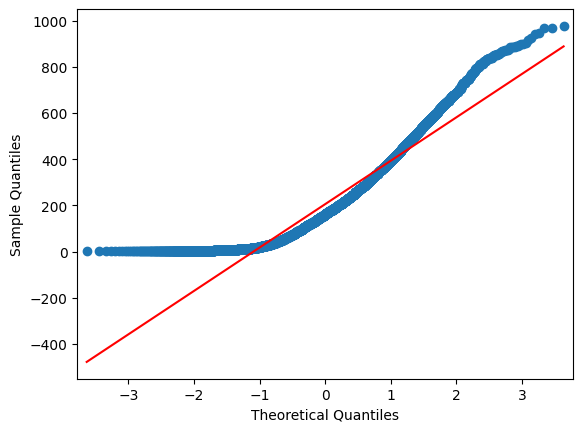

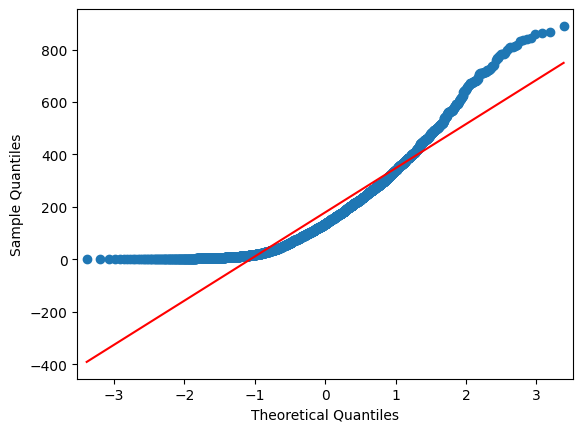

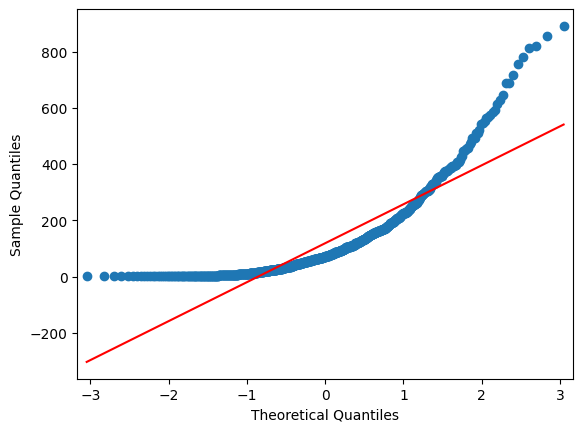

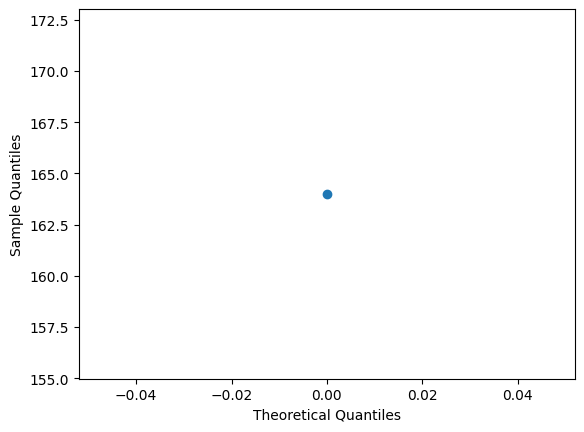

In [ ]:
#Lets plot a qqplot to see hows the distribution
index=0
while index != 4:
  qqplot(weather_groups[index], line="s")
  index+=1

We Can see that none of the weather groups have a normal distribution so we'll conduct one way annova on weather and season vs count and later check with interaction between the two.



In [ ]:
f_stats,p_value = f_oneway(w1,w2,w3,w4)
print(f"f_stats:{f_stats}")
print(f"p_value:{p_value}")
if p_value < 0.05:
    print("Reject Ho")
    print("Atleast one group have different mean")
else:
    print("Fail to reject Ho")
    print("All groups have same mean")

f_stats:65.53024112793271
p_value:5.482069475935669e-42
Reject Ho
Atleast one group have different mean


From this we can say that atleast one of the weather group count is statistically different from the other.

By performing an ANOVA test on different weather conditions except 4 with respect to count, we can infer that population count means under different weather conditions are the same, meaning there is a difference in the usage of Yulu bikes in different weather conditions.

In [ ]:
#Lets perform one_way annova for seasons
f_stats,p_value = f_oneway(s1,s2,s3,s4)
print(f"f_stats:{f_stats}")
print(f"p_value:{p_value}")
if p_value < 0.05:
    print("Reject Ho")
    print("Atleast one group have different mean")
else:
    print("Fail to reject Ho")
    print("All groups have same mean")

f_stats:236.94671081032106
p_value:6.164843386499654e-149
Reject Ho
Atleast one group have different mean


So here also we get the same result as weather.

ANOVA test on different seasons with respect to count,implies that population count means under different seasons are not the same, meaning
there is a difference in the usage of Yulu bikes in different seasons

In [ ]:
#Lets conduct a 2 way annova to find out the count of cycles rented based on weather groups and season groups
import statsmodels.api as sm
from statsmodels.formula.api import ols
test = ols('count ~ C(weather) * C(season)', data=data).fit()  #tilda
sm.stats.anova_lm(test, typ = 2)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 6
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(weather),9.034678e+06,3.0,99.622113,1.337521e-43
C(season),2.519275e+07,3.0,277.791271,2.177371e-118
C(weather):C(season),8.382528e+05,9.0,3.081036,5.150817e-03
Residual,3.286889e+08,10873.0,NaN,NaN


Since the variances are not same we cannot go with the above results of annova.

In [ ]:
#Lets do a Kurskal wallis test
from scipy import stats
kruskal_stat, p_value = stats.kruskal(w1,w2,w3,w4,s1,s2,s3,s4)
print("p_value :",p_value)
if p_value<0.05:
  print("Since p-value is less than 0.05, we reject the null hypothesis")
else :
  print("Since p-value is less than 0.05, we fail to reject the null hypothesis")


p_value : 4.614440933900297e-191
Since p-value is less than 0.05, we reject the null hypothesis


In [ ]:
# Lets perform a chisquare test to check if weather is dependent on season

season_weather = pd.crosstab(data['season'], data['weather'])
print(f"Observed values:{season_weather}")


Observed values:weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0


Ho: Weather and Season are independent.

---


Ha: Weather ans Season are dependent.

In [ ]:
chi2_stat, p_val, dof, expected_values = chi2_contingency(season_weather)

print("chi2_stat :",chi2_stat)
print("p_value :",p_val)
print("degree of freedom :",dof)
print("expected value :",expected_values)

alpha =0.05

if p_val<alpha :
    print("Reject Ho")
else:
    print("Fail to Reject Ho")

chi2_stat : 49.158655596893624
p_value : 1.549925073686492e-07
degree of freedom : 9
expected value : [[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]
Reject Ho


So from the above test we can infer that weather and season are dependent

# Insights

1. Conducting a 2-sample T-test on working and non-working days regarding count suggests that the average population count across both categories is identical.

2. Utilizing an ANOVA test on different seasons concerning count implies that the mean population counts vary across distinct seasons, indicating differing usage patterns of Yulu bikes throughout the year.

3. By performing an ANOVA test on various weather conditions, excluding four, relative to count, we can deduce that the mean population counts across different weather conditions are equivalent, indicating a disparity in Yulu bike usage across diverse weather conditions.

4. Employing a Chi2 test on season and weather (categorical variables) allows us to infer that weather is influenced by season.

5. The highest number of holidays is observed during the fall and winter seasons.

6. A positive correlation exists between counts and temperature.

7. There is a negative correlation between counts and humidity.

8. A greater number of counts is associated with clear weather and fewer clouds, as evidenced by the ANOVA hypothesis test.

# Recommendations

1. Implement targeted marketing strategies aimed at attracting more casual users to increase overall Yulu bike usage. This could include offering first-time user discounts, introducing friends and family discounts, and providing referral bonuses to incentivize new users.

2. Develop promotional activities specifically tailored for non-working days to boost usage during these periods. Ideas could include organizing city exploration competitions or hosting health campaigns to encourage Yulu bike rentals.

3. During heavy rains when bike rentals decrease significantly, consider diversifying the vehicle options available to users. Introducing alternative modes of transportation such as cars or providing shelters or protection from the rain can help maintain usage levels during inclement weather.

4. Enhance the user experience by optimizing the availability of Yulu bikes during peak demand periods, especially on weekends and holidays, to capitalize on potential ridership.

5. Offer incentives or rewards for consistent usage, such as loyalty programs or mileage-based discounts, to foster long-term engagement with the Yulu platform.

6. Implement dynamic pricing strategies to adjust rental rates based on weather conditions, offering discounts during unfavorable weather to encourage usage and adjusting rates during peak demand periods to maximize revenue.

7. Enhance the Yulu app with features such as real-time weather updates and route suggestions tailored to weather conditions to assist users in planning their rides more effectively.

8. Collaborate with local businesses or events to offer exclusive promotions or tie-ins with Yulu rentals, further incentivizing usage and increasing brand visibility within the community.